In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make -j8
!sudo make install
%cd ..

--2022-05-04 06:56:00--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-05-04 06:56:01--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-05-04 06:56:01--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.s

In [ ]:
!pip install --upgrade pandas-datareader
!pip install TA-Lib

     |████████████████████████████████| 109 kB 5.6 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
     |████████████████████████████████| 269 kB 5.4 MB/s 
  Created wheel for TA-Lib: filename=TA_Lib-0.4.24-cp37-cp37m-linux_x86_64.whl size=1465732 sha256=e42acb44ae938564a9fdaf8f2d3b5f23369bb3c0fc1766cec59efbbc4b1cc0b5
  Stored in directory: /root/.cache/pip/wheels/02/b1/a5/aca31e8cdd0137d7a83bf72237056b8705663dd1f9b5eac11e
Successfully built TA-Lib


In [ ]:
import talib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
%matplotlib inline

sns.set()

In [ ]:
import pandas_datareader as pdr

start = '2017-9-30'
end = '2021-9-30'

tickers = ['PYPL', 'SHOP', 'TSLA', 'GOOG', 'DIS', 'AAPL', 'MSFT', 'NFLX', 'AMZN']
stock_actual = {}
for ticker in tickers:
  stock_actual[ticker] = pdr.data.DataReader(ticker, start=start, end=end, data_source='yahoo')

# s&p 500 as market price proxy
market_prices = pdr.data.DataReader('SPY', start=start, end=end, data_source='yahoo')
test_size = 30

In [ ]:
tick = 'AAPL'
stock_data = stock_actual[tick].copy()
feature_names = []
for n in [14, 30, 50, 200]:
    stock_data['ma' + str(n)] = talib.SMA(stock_data['Adj Close'].values, timeperiod=n)
    stock_data['rsi' + str(n)] = talib.RSI(stock_data['Adj Close'].values, timeperiod=n)

    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

In [ ]:
stock_data['Volume_1d_change'] = stock_data['Volume'].pct_change()

volume_features = ['Volume_1d_change']
feature_names.extend(volume_features)

In [ ]:
stock_data['30d_future_close'] = stock_data['Adj Close'].shift(-30)
stock_data['30d_close_future_pct'] = stock_data['30d_future_close'].pct_change(30)

In [ ]:
# stock_data.tail(30)

In [ ]:
stock_data.dropna(inplace=True)

X = stock_data[feature_names]
y = stock_data['30d_close_future_pct']

train_size = y.shape[0]-30
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

In [ ]:
train_size

747

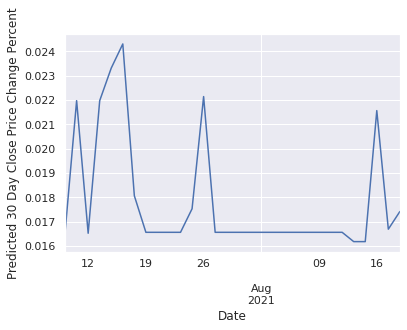

In [ ]:
rf_model = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=8)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

y_pred_series = pd.Series(y_pred, index=y_test.index)
y_pred_series.plot()
plt.ylabel("Predicted 30 Day Close Price Change Percent")
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.02682696450746302
Mean Squared Error: 0.0011306368791926921
Root Mean Squared Error: 0.033624944300216945


In [ ]:
y_test.index

DatetimeIndex(['2021-07-08', '2021-07-09', '2021-07-12', '2021-07-13',
               '2021-07-14', '2021-07-15', '2021-07-16', '2021-07-19',
               '2021-07-20', '2021-07-21', '2021-07-22', '2021-07-23',
               '2021-07-26', '2021-07-27', '2021-07-28', '2021-07-29',
               '2021-07-30', '2021-08-02', '2021-08-03', '2021-08-04',
               '2021-08-05', '2021-08-06', '2021-08-09', '2021-08-10',
               '2021-08-11', '2021-08-12', '2021-08-13', '2021-08-16',
               '2021-08-17', '2021-08-18'],
              dtype='datetime64[ns]', name='Date', freq=None)

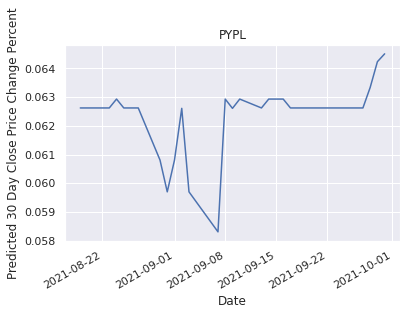

0.06262215991877733 0.038325063315124065


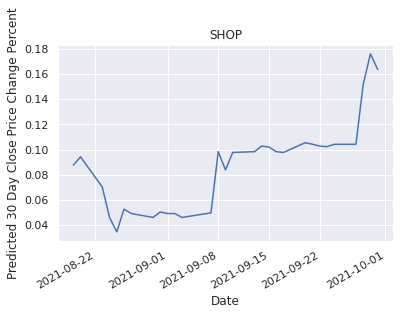

0.08765209506606032 0.0752535329252472


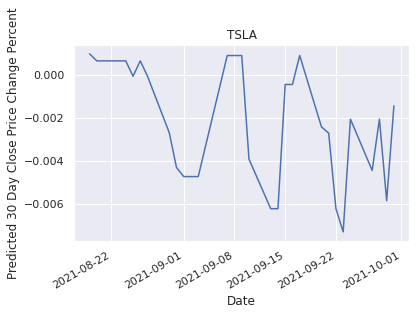

0.000964590995775547 -0.15146927732965312


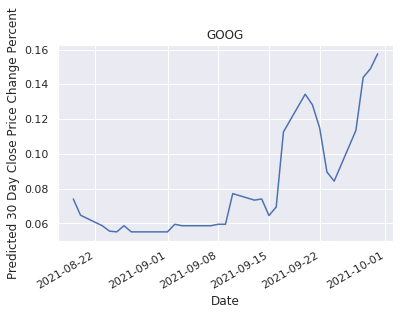

0.07401468976250981 0.026644545796104372


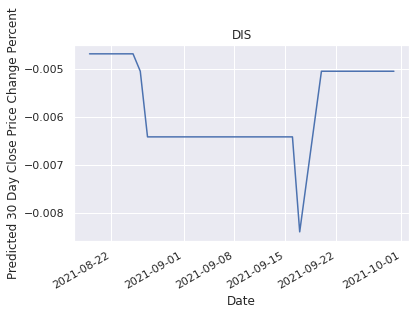

-0.004685909688314759 0.023549794118641776


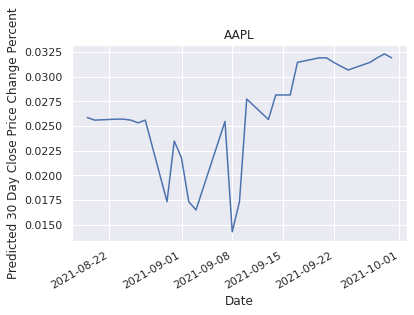

0.025864471987028837 0.03544646936889044


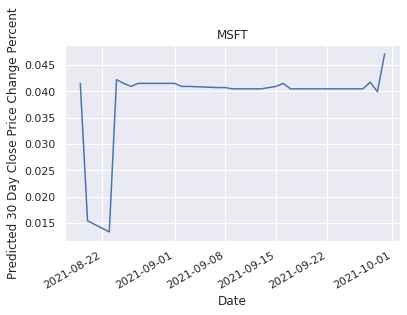

0.04151107929691561 0.05003867013403898


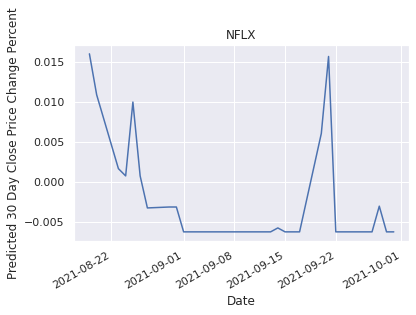

0.016003196239316064 -0.12254695001035569


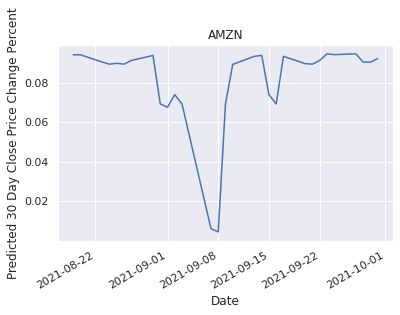

0.09415477885032551 -0.03051997147282566


In [ ]:
viewdict = {}
for tick in tickers:
  stock_data = stock_actual[tick].copy()
  feature_names = []
  for n in [14, 30, 50, 200]:
      stock_data['ma' + str(n)] = talib.SMA(stock_data['Adj Close'].values, timeperiod=n)
      stock_data['rsi' + str(n)] = talib.RSI(stock_data['Adj Close'].values, timeperiod=n)

      feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

  stock_data['Volume_1d_change'] = stock_data['Volume'].pct_change()
  # stock_data['log_return'] = np.log(1 + stock_data['price'].pct_change())

  volume_features = ['Volume_1d_change']
  feature_names.extend(volume_features)

  stock_data['30d_future_close'] = stock_data['Adj Close'].shift(-30)
  stock_data['30d_close_future_pct'] = stock_data['30d_future_close'].pct_change(30)

  stock_data_ = stock_data.copy()
  stock_data.dropna(inplace=True)

  X = stock_data[feature_names]
  y = stock_data['30d_close_future_pct']

  rf_model = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=8)
  rf_model.fit(X, y)

  y_pred = rf_model.predict(stock_data_[feature_names].iloc[-30:])

  y_pred_series = pd.Series(y_pred, index=stock_data_[-30:].index)
  y_pred_series.plot()
  plt.title(tick)
  plt.ylabel("Predicted 30 Day Close Price Change Percent")
  plt.show()
  viewdict[tick] = round(y_pred[0], 3)
  print(y_pred[0], (stock_actual[tick]['Close'].iloc[-30]- stock_actual[tick]['Close'].iloc[-1])/stock_actual[tick]['Close'].iloc[-30])

In [ ]:
print(viewdict)

{'PYPL': 0.063, 'SHOP': 0.088, 'TSLA': 0.001, 'GOOG': 0.074, 'DIS': -0.005, 'AAPL': 0.026, 'MSFT': 0.042, 'NFLX': 0.016, 'AMZN': 0.094}


In [ ]:
# (stock_actual['AAPL']['Close'].iloc[-30]- stock_actual['AAPL']['Close'].iloc[-1])/stock_actual['AAPL']['Close'].iloc[-30]

0.03544646936889044